# Reporte análisis de datos exploratorios 

# Breyner Ocampo Cárdenas 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Data_Caso_Propuesto.csv')

# Analisis de Datos
Analisis de datos de caso propuesto base de datos de terrenos inmobiliarios, se pretende responder 3 preguntas acerca del dataframe.
- ¿Cuál es el comportamiento del valor de los inmuebles?
- ¿Cuál es la zona poblacional en la que se debe concentrar la estrategia comercial teniendo en cuenta el precio del inmueble?
- ¿Cuál es la región con mayor potencial de venta de inmuebles teniendo en cuenta los precio?
## Tipos de variables
### variables categoricas: Dtype = objeck
### variables numericas: Dtype = int64, float64

Al visualizar la información , en la columna no-null se observa la presencia de números diferentes, indicando que hay columnas con valores nulos, para decidir si se borran o no depende de que tan significativo sea borrarlos.

In [ ]:
# df.head()

Para determinar como se encuentra estructurado nuestro dataframe, utilizamos df.info() para identificar tanto variables categoricas como numéricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


In [ ]:
# df["Datos Adicionales"][5]
df["Barrio"]
df["Departamento"].unique()
df["Tipo de Inmueble"].unique()
area =len(df["Area Terreno"].unique())
darea=df["Area Terreno"].unique()



# Valores nulos
Para identificar la cantidad de valores nulos por columna  se debe realizar:

In [ ]:
df.isnull().sum()
# df.Barrio.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

In [ ]:
nNullsA= df["Datos Adicionales"].isnull().sum()

nData = df.Codigo.count()
PorNullsA = round((nNullsA/nData)*100,2)
nDataSNulls = nData-nNullsA
# ds = pd.Series([nData,nNullSNulls,nNUlls,PorNulls])
d = np.array([nData,nDataSNulls,nNullsA,PorNullsA])
ds = pd.Series(d)
ds.T

0    463.00
1    118.00
2    345.00
3     74.51
dtype: float64

In [ ]:
# nNullsB= df.Barrio.isnull().sum()
# nData = df.Codigo.count()
# PorNullsB = round((nNullsB/nData)*100,2)
# nDataSNulls = nData-nNulls
# # ds = pd.Series([nData,nNullSNulls,nNUlls,PorNulls])
# d = np.array([nData,nDataSNulls,nNullsB,PorNullsB])
# ds = pd.Series(d)
# ds.T
# # nNulls

# Conclusión sobre datos nulos
 Ya que las columnas de los datos no es relevante para el análisis del proyecto como lo es el barrio y datoa adicionales, representando un 74.51% de los datos nullos para datoa adicionales y un 91.36% para los datos nullos de la columna Barrio, no se borraran las columnas, ya que implicaria que la base de datos quedara solo con 23 datos.

In [ ]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 3 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  23 non-null     int64  
 1   Ciudad                  23 non-null     object 
 2   Departamento            23 non-null     object 
 3   Barrio                  23 non-null     object 
 4   Direccion               23 non-null     object 
 5   Area Terreno            23 non-null     float64
 6   Area Construida         23 non-null     float64
 7   Detalle Disponibilidad  23 non-null     object 
 8   Estrato                 23 non-null     object 
 9   Precio                  23 non-null     float64
 10  Tipo de Inmueble        23 non-null     object 
 11  Datos Adicionales       23 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.3+ KB


# Valores duplicados
 Se verifica que no hayan inmuebles duplicados, ya que solo debe haber un inmueble a la venta por cada codigo, se observa que no hay cambios en el dataframe por tanto no hay inmuebles duplicados.

In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 47.0+ KB


# Agrupación de datos
Se define la el tipo de dato agrupar, definiendo un rango y nombre.
Para este caso se agrupa por precio definiendo los rangos de acuerdo a los cuartiles obtenidos con el describe de pandas acerca del valor del precio como se observa a continuación.

In [ ]:
# df.decribe()

In [ ]:
dtprecio = df.describe().Precio
dtprecio

count    4.630000e+02
mean     6.672032e+08
std      3.272992e+09
min      4.650000e+06
25%      1.230500e+07
50%      1.587000e+07
75%      1.379955e+08
max      4.523379e+10
Name: Precio, dtype: float64

In [ ]:
dtprecio = dtprecio.to_list()

dtprecio 

[463.0,
 667203190.312095,
 3272992027.691989,
 4650000.0,
 12305000.0,
 15870000.0,
 137995500.0,
 45233789820.0]

In [ ]:
dtprecio = dtprecio[3:]

# dtprecio[3:]



dtprecio

[4650000.0, 12305000.0, 15870000.0, 137995500.0, 45233789820.0]

In [ ]:
2.958081e+10-4650000.0
# 2.958081e+10
15870000.0-1.448242e+09

-1432372000.0

In [ ]:
dtprecio

[4650000.0, 12305000.0, 15870000.0, 137995500.0, 45233789820.0]

In [ ]:
df['Area Construida'].describe()

maxC = df['Area Construida'].max()

# Rango por precio de cuartiles

Entonces se divide de acuerdo a las letras "ABCD"


|  dat  |  val        |   rango|
|------ |-------------|---|
| val   |   0         |  A |
|  min  |   4650000.0 |  A|
|  25%  |   12305000.0|  B |
|  50%  |   15870000.0|  C|
|  75%  |    137995500.0 |   D|
|  max  |    45233789820.0 |D|

Por tanto el rango de precios es D>C>B>A>0



In [ ]:
dtprecio

# rango = [precio for precio in  dtprecio]
# rango = [17,28,38,48,58,68]
rango  = dtprecio
print(len(rango))
nameR = list("DCBA")
print(len(nameR))
nameR
rango
#Crea nueva variable
df['Rango_precio'] = pd.cut(df['Precio'],bins=rango,labels=nameR)
# df

# pf.cut(df['Precio'],bin
columDep = df["Departamento"].unique()
columDep
columEst =df["Estrato"].unique()

# df.column()

5
4


In [ ]:
df.tail()

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales,Rango_precio
458,12709,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 562 CENTRO COMERCIAL SA...,0.0,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.960534e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...,B
459,17992,BOGOTA,CUNDINAMARCA,NaN,CR 70 NO. 49-77,0.0,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.448242e+09,CASA,NaN,A
460,12708,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 564 CENTRO COMERCIAL SAN...,0.0,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.070134e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...,B
461,12706,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 367 CENTRO COMERCIAL SAN...,0.0,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.060800e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...,B
462,12707,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 370 CENTRO COMERCIAL SAN...,0.0,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.060800e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...,B


# Gráficos 
## En relación al análisis de datos exploratorios
 Despues de tomar las desiciones respectivas sobre borrar o no valores nulos y duplicados, a su vez de generar columnas que permitan analizar mejor los datos, como es el caso del rango por el precio teniendo como referencia los valores estadisticos de los cuartiles, se procede a realizar las respecticas gráficas. 

# Histogramas 

Se observa que le dataset analizado no describe una distribución caracteristica de la estadisca basica, ya que los valores se encuentran acumulados en valores unicos, como lo es la cantidad de valores con cero.

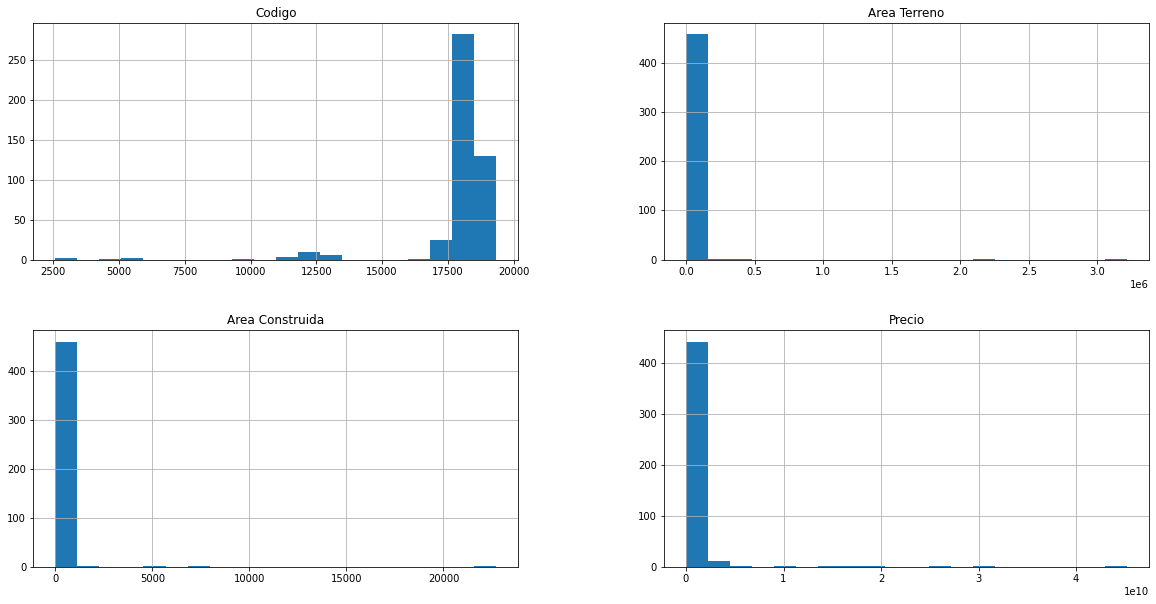

In [ ]:
df.hist(bins=20,figsize=(20,10))
plt.show()

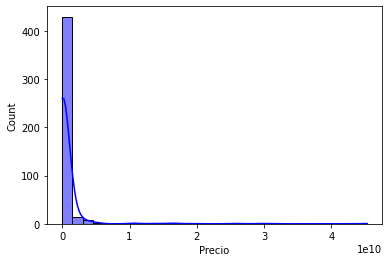

In [ ]:
sns.histplot(df.Precio,color="b",bins=30,kde=True)
# sns.histplot(df["Area Terreno",color="b",bins=30,kde=True)
plt.show()

# Gráfico de Barras 

Al agrupar los valores de los precios se observa que ya hay una mejor agrupación respecto a la cantidad de inmuebles registrados, a su vez se observa que hay mayor cantidad de inmuebles con precios Altos con categoria D, a su vez hay mayor inmuebles en el departamento del meta y predomina el tipo local.

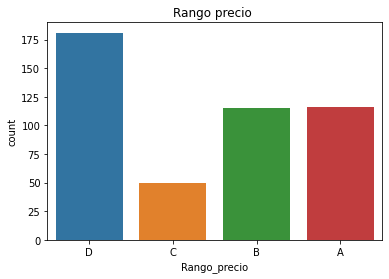

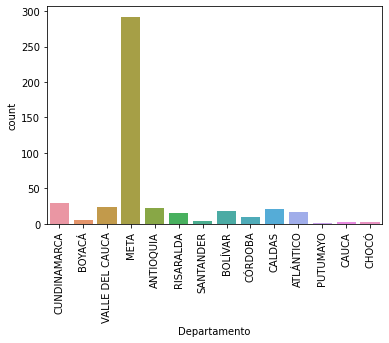

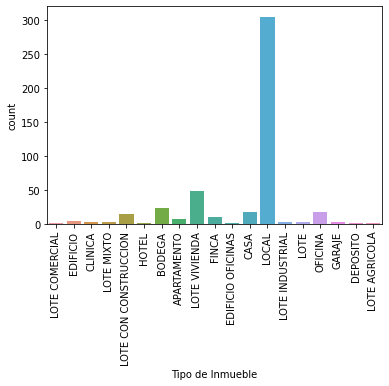

In [ ]:
# fig = plt.Figure(figsize=(10,7))
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.countplot(df.Rango_precio)
plt.title("Rango precio ")
plt.show()

# plt.figure(figsize=(30, 12))
# plt.title("Departamento")
sns.countplot(df.Departamento)
plt.xticks(rotation=90)
plt.show()
sns.countplot(df['Tipo de Inmueble'])
plt.xticks(rotation=90)
plt.show()
# plt.savefig("inmu_cant.png")

# Gráfica de pie o pastel 

Nos indica el porcentaje de inmuebles por el rango de precios establecido.


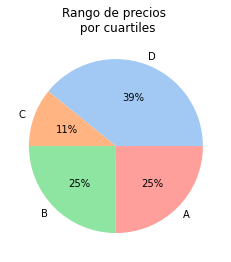

In [ ]:
total_precio = df['Precio'].groupby(df['Rango_precio']).count()
etiquetas = list("DCBA")
colors = sns.color_palette('pastel')[0:6]
plt.pie(total_precio, labels = etiquetas, colors = colors,
autopct='%.0f%%')
plt.title("Rango de precios \n por cuartiles")
plt.show()

In [ ]:
total_precio = df['Precio'].groupby(df['Rango_precio']).count()
total_precio

Rango_precio
D    181
C     50
B    115
A    116
Name: Precio, dtype: int64

# Pie depaartamento de acuerdo al precio
 Hay mayor cantidad de precios  en el departamento de caldas a pesar de que hay mayor cantidad de inmuebles en el meta.

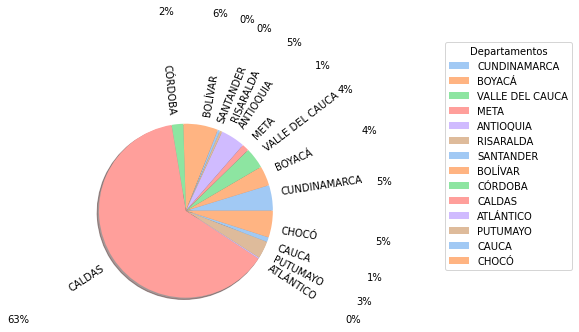

In [ ]:

total_preDep = df['Precio'].groupby(df['Departamento']).count()
# etiquetas = [0,1,2,3]
etiquetas = columDep
colors = sns.color_palette('pastel')[0:6]
explode = (0, 0.1, 0, 0) 
wedges, texts, autotexts =plt.pie(total_preDep, labels = etiquetas, colors = colors,
autopct='%.00f%%',rotatelabels = True,pctdistance=2.3,shadow=True)
# plt.xticks(rotation=10)
# plt.pie(total_hijos, colors = colors,
# autopct='%.0f%%')
texts[5].set_position((0.5,1.))
autotexts[5].set_position((0.7,2.2))
texts[6].set_position((0.35,1.))
autotexts[6].set_position((0.9,2.1))

# autotexts[0].set_position((1,1.))
plt.legend(wedges, columDep,
          title="Departamentos",
          loc="center right",
          bbox_to_anchor=(1, 0, 1.3, 1.5))

plt.show()
# autotexts[6]
# texts

In [ ]:
total_preDep = df['Precio'].groupby(df['Departamento']).count()
total_preDep

Departamento
ANTIOQUIA           22
ATLÁNTICO           17
BOLÍVAR             18
BOYACÁ               6
CALDAS              21
CAUCA                2
CHOCÓ                2
CUNDINAMARCA        30
CÓRDOBA             10
META               292
PUTUMAYO             1
RISARALDA           15
SANTANDER            4
VALLE DEL CAUCA     23
Name: Precio, dtype: int64

# Rango de precio por Estrato 

 Se observa que el porcentaje más alto corresponde a comercial, lo cual concuerda, ya que la mayor cantidad de inmuebles es de tipo local.

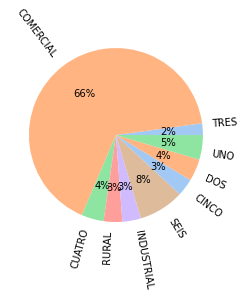

Estrato
CINCO          10
COMERCIAL     307
CUATRO         19
DOS            16
INDUSTRIAL     16
RURAL          39
SEIS           15
TRES           19
UNO            21
Name: Rango_precio, dtype: int64


In [ ]:
total_precio = df['Rango_precio'].groupby(df['Estrato']).count()
# etiquetas = [0,1,2,3]
etiquetas = columEst
colors = sns.color_palette('pastel')[0:6]
plt.pie(total_precio, labels = etiquetas, colors = colors,
autopct='%.0f%%',rotatelabels = True)
# plt.pie(total_precio, colors = colors,
# autopct='%.0f%%')
plt.show()
print(total_precio)

# Gráficos de boxplot

En el gráfico de cajas y bigotes, se observa  que en referencia al estrato y al precio, se destaca que estrato rural, cinco y comercial  tienen un valor mucho mas costoso, como se esperaba debido a las dimensiones y calidad de vida que se espera tener en este tipo de estratos inmobiliarios. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

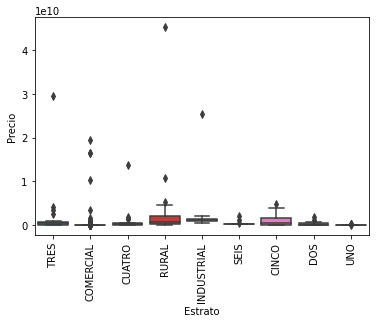

In [ ]:
sns.boxplot(x=df["Estrato"],y=df["Precio"])
plt.xticks(rotation=90)
# fumador_valor = sns.boxplot(x=df[""],y=df["Rango_precio"])

# Correlación 
Se observa una correlación media para el terreno y el precio, mucho mas alto entre precio y area construida, ya que dan mayor valor a la propiedad.

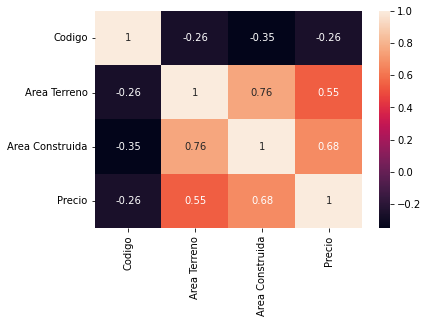

In [ ]:
correlacion = df.corr()
correlacion
sns.heatmap(correlacion,xticklabels=correlacion.columns,yticklabels=correlacion.columns,annot=True)
plt.show()

# Relación entre 3 variables 
La relación entre el departamento junto con el rango del precio a partir del estrato , se destaca  caldas, meta y valle del cauca posee inmuebles con un estrato alto y precio alto, caso contrario para los departamentos del cauca, putumayo y boyaca.

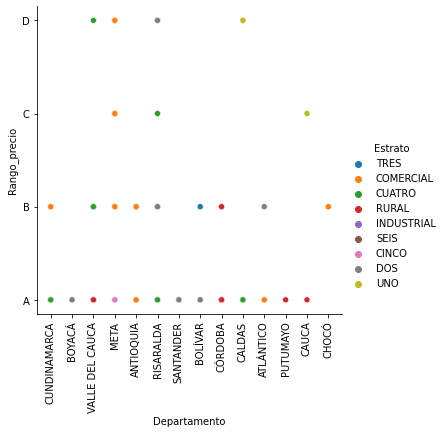

In [ ]:
sns.relplot(x='Departamento' ,y='Rango_precio',hue='Estrato',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# sns.relplot(x='Ciudad' ,y='Rango_precio',hue='Estrato',data=df)
# plt.xticks(rotation=90)
# plt.show()

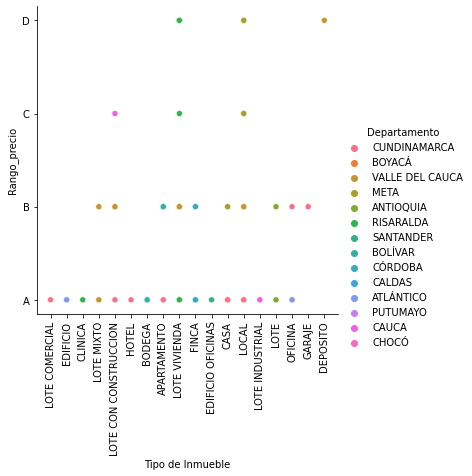

In [ ]:
sns.relplot(x='Tipo de Inmueble' ,y='Rango_precio',hue='Departamento',data=df)
plt.xticks(rotation=90)
plt.show()

# Conclusiones 

* Los inmuebles no describen ningun compartamiento de tendencia central estadistica, talvez se mejore si la base de datos se mejorrar suministrando mas información.
* La zona con a la cual se pude desplegar una estrategía comercial fuerte, puede ser el departamento del meta, ya que abarca gran cantidad de inmuebles con precios medianos, por otro lado la zona del departamento de caldas puede ser atractiva para grandes inversionistas. 



In [ ]:
# sns.relplot(x='Departamento' ,y='Rango_precio',hue='Tipo de Inmueble',data=df)
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# sns.relplot(x='Departamento' ,y='Precio',hue='Tipo de Inmueble',data=df)
# plt.xticks(rotation=90)
# # plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.barplot(data=df,x='Departamento',y='Precio',hue='Tipo de Inmueble')
# plt.legend( loc='upper right') 
# plt.xticks(rotation=90)
# plt.show()

In [ ]:

# plt.figure(figsize=(12, 8))
# sns.barplot(data=df,x='Departamento',y='Precio',hue='Estrato')
# plt.legend( loc='upper right') 
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# # Area Terreno            463 non-null    float64
# #  6   Area Construida 
# plt.figure(figsize=(12, 8))
# sns.barplot(data=df,x='Departamento',y='Precio',hue='Area Construida')
# plt.legend( loc='upper right') 
# plt.xticks(rotation=90)
# plt.show()